<a href="https://colab.research.google.com/github/LuisFernandoPareja/Portfolio/blob/main/SODevSurvey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stack Overflow Developer Survey Data Analysis

In May 2024 over 65,000 developers responded to the Stack Overflow Annual Developer Survey about coding, working, AI and how they feel about all of those topics and more.

We will explore this dataset and get some insights from it using data analysis techniques with python.
Dataset available [here](https://survey.stackoverflow.co/)



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Upload Files
from google.colab import files

files.upload()

{}

In [ ]:
#Move the dataset to the drive so you wont have to download this every time
!mv "/content/survey_results_public.csv" '/content/gdrive/MyDrive/Datasets'

mv: cannot stat '/content/survey_results_public.csv': No such file or directory


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read and take a look at the first 5 rows of the dataframe
survey_df = pd.read_csv('/content/gdrive/MyDrive/Datasets/survey_results_public.csv')
survey_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


For the questions we are going to answer here we don't need the whole dataset. Of course we could formulate more questions and hence use more data from the dataset but I'm trying to keep things concise.
Before answering questions, we are going to understand the dataset, take a look at the columns and the values they contain, drop some of these columns and perform exploratory data analysis (EDA).

In [ ]:
# How many columns does this DataFrame have?
print(survey_df.columns.values)

['ResponseId' 'MainBranch' 'Age' 'Employment' 'RemoteWork' 'Check'
 'CodingActivities' 'EdLevel' 'LearnCode' 'LearnCodeOnline' 'TechDoc'
 'YearsCode' 'YearsCodePro' 'DevType' 'OrgSize' 'PurchaseInfluence'
 'BuyNewTool' 'BuildvsBuy' 'TechEndorse' 'Country' 'Currency' 'CompTotal'
 'LanguageHaveWorkedWith' 'LanguageWantToWorkWith' 'LanguageAdmired'
 'DatabaseHaveWorkedWith' 'DatabaseWantToWorkWith' 'DatabaseAdmired'
 'PlatformHaveWorkedWith' 'PlatformWantToWorkWith' 'PlatformAdmired'
 'WebframeHaveWorkedWith' 'WebframeWantToWorkWith' 'WebframeAdmired'
 'EmbeddedHaveWorkedWith' 'EmbeddedWantToWorkWith' 'EmbeddedAdmired'
 'MiscTechHaveWorkedWith' 'MiscTechWantToWorkWith' 'MiscTechAdmired'
 'ToolsTechHaveWorkedWith' 'ToolsTechWantToWorkWith' 'ToolsTechAdmired'
 'NEWCollabToolsHaveWorkedWith' 'NEWCollabToolsWantToWorkWith'
 'NEWCollabToolsAdmired' 'OpSysPersonal use' 'OpSysProfessional use'
 'OfficeStackAsyncHaveWorkedWith' 'OfficeStackAsyncWantToWorkWith'
 'OfficeStackAsyncAdmired' 'OfficeSt

There are +100 columns!, do they all really provide important/relevant information?

In [ ]:
# Fill NA values in some relevant columns
survey_df.fillna({'YearsCodePro': 0}, inplace=True)
survey_df.fillna({'WorkExp': 0}, inplace=True)
survey_df.fillna({'CompTotal': 0}, inplace=True)

In [ ]:
# Drop undesired columns
survey_df = survey_df.drop(['Check', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3',
 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8',
 'Knowledge_9', 'Frequency_1', 'Frequency_2' ,'Frequency_3','TimeAnswering', 'Frustration', 'ProfessionalTech', 'ProfessionalCloud',
 'ProfessionalQuestion','JobSatPoints_1', 'JobSatPoints_4',
 'JobSatPoints_5' ,'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8',
 'JobSatPoints_9' ,'JobSatPoints_10' ,'JobSatPoints_11', 'SurveyLength',
 'SurveyEase' ,'ConvertedCompYearly'], axis=1)

In [ ]:
# Take a look at the new Dataframe
survey_df[['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
 'CodingActivities', 'EdLevel', 'LearnCode' ,'LearnCodeOnline', 'TechDoc',
 'YearsCode', 'YearsCodePro' ,'DevType', 'OrgSize' ,'PurchaseInfluence',
 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country' ,'Currency' ,'CompTotal']].head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,0.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,0.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,27,Developer Experience,NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,0.0
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,0,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,Canada,NaN,0.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,0,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,Norway,NaN,0.0


## 1. In what Industries do developers get paid the most?

In [ ]:
# Show the currency and the value for the yearly total compensation in that currency
survey_df[['CompTotal', 'Currency']].query('CompTotal > 0').head(20)

,CompTotal,Currency
72,2040000.0,PKR\tPakistani rupee
374,28000.0,EUR European Euro
379,85000.0,EUR European Euro
385,50000.0,EUR European Euro
389,110000.0,USD\tUnited States dollar
392,126420.0,GBP\tPound sterling
395,95000.0,GBP\tPound sterling
398,195000.0,USD\tUnited States dollar
403,35000.0,GBP\tPound sterling
409,54000.0,EUR European Euro


We can see that in this dataset we have several currencies, what we're going to do in the next steps is create a new column called CompTotalUSD so we can have common ground between all these 'salaries'. We are also going to change the long name of the currency and just leave the abbreviation

In [ ]:
# Abbreviation part
survey_df[['CurrencyAbr', 'CurrencyLong']] = survey_df['Currency'].str.split('\t', expand=True)
survey_df[['CurrencyAbr', 'CurrencyLong']] = survey_df['Currency'].str.split(n=1,expand=True)
survey_df[['CurrencyAbr', 'CurrencyLong', 'CompTotal']].query('CompTotal > 0').head(20)

,CurrencyAbr,CurrencyLong,CompTotal
72,PKR,Pakistani rupee,2040000.0
374,EUR,European Euro,28000.0
379,EUR,European Euro,85000.0
385,EUR,European Euro,50000.0
389,USD,United States dollar,110000.0
392,GBP,Pound sterling,126420.0
395,GBP,Pound sterling,95000.0
398,USD,United States dollar,195000.0
403,GBP,Pound sterling,35000.0
409,EUR,European Euro,54000.0


Before going any further with the transformations, we will find out that not every currency has its respective abbreviation.
This is the case for the 'Faroese krona' currency or the 'Cook Islands dollar' currency. In our data set we have as abbreviation for these 'none'. So we will replace these values for 'FOK' for the 'Faroese krona' currency and 'NZD' for the 'Cook Islands dollar' (turns out that these two currencies -Cook Islands dollar & New Zealand Dollar- are equivalent)

In [ ]:
survey_df[['CurrencyAbr','CurrencyLong', 'CompTotal']].query('CurrencyLong == "Faroese krona" or CurrencyLong == "Cook Islands dollar"')

,CurrencyAbr,CurrencyLong,CompTotal
14761,none,Faroese krona,0.0
24049,none,Faroese krona,5255520.0
52937,none,Cook Islands dollar,0.0


With the id given by the previous table we can look for these values and replace them directly. Since they are only three we can do these individually

In [ ]:
survey_df.loc[52937, 'CurrencyAbr'] = 'NZD'
survey_df.loc[14761, 'CurrencyAbr'] = 'FOK'
survey_df.loc[24049, 'CurrencyAbr'] = 'FOK'

In [ ]:
survey_df[['CurrencyAbr','CurrencyLong', 'CompTotal']].query('CurrencyLong == "Faroese krona" or CurrencyLong == "Cook Islands dollar"')

,CurrencyAbr,CurrencyLong,CompTotal
14761,FOK,Faroese krona,0.0
24049,FOK,Faroese krona,5255520.0
52937,NZD,Cook Islands dollar,0.0


And now for the conversion of every currency to USD we are going to use an exchange rate API with the help of the 'requests' library

In [ ]:
import requests

# Colab allows us to store secrets like api keys
from google.colab import userdata

In [ ]:
# API URL and your API key
API_KEY = userdata.get('exchange_api')  # Replace with your API key
API_URL = f"https://v6.exchangerate-api.com/v6/{API_KEY}/latest/USD"  # Replace with your API's endpoint

# Fetch exchange rates
response = requests.get(API_URL)
if response.status_code == 200:
    rates = response.json()['conversion_rates']
    print("Exchange Rates Fetched Successfully!")
    # I added this 'KPW' abbreviation since the API didn't contain the North Korean currency
    rates["KPW"] = 899.9582
    print(rates)
else:
    raise Exception(f"API Error: {response.status_code}, {response.text}")



Exchange Rates Fetched Successfully!
{'USD': 1, 'AED': 3.6725, 'AFN': 78.6678, 'ALL': 95.3254, 'AMD': 399.4525, 'ANG': 1.79, 'AOA': 918.1482, 'ARS': 1053.5, 'AUD': 1.6075, 'AWG': 1.79, 'AZN': 1.7003, 'BAM': 1.8843, 'BBD': 2.0, 'BDT': 121.882, 'BGN': 1.8842, 'BHD': 0.376, 'BIF': 2916.4659, 'BMD': 1.0, 'BND': 1.3563, 'BOB': 6.9345, 'BRL': 5.8596, 'BSD': 1.0, 'BTN': 86.6441, 'BWP': 13.9279, 'BYN': 3.2762, 'BZD': 2.0, 'CAD': 1.4492, 'CDF': 2843.5793, 'CHF': 0.9103, 'CLP': 985.1012, 'CNY': 7.2873, 'COP': 4207.7408, 'CRC': 507.0438, 'CUP': 24.0, 'CVE': 106.2338, 'CZK': 24.2409, 'DJF': 177.721, 'DKK': 7.1884, 'DOP': 61.6272, 'DZD': 135.1181, 'EGP': 50.2331, 'ERN': 15.0, 'ETB': 126.5374, 'EUR': 0.9635, 'FJD': 2.3197, 'FKP': 0.8055, 'FOK': 7.1884, 'GBP': 0.806, 'GEL': 2.8634, 'GGP': 0.8055, 'GHS': 15.5637, 'GIP': 0.8055, 'GMD': 72.5506, 'GNF': 8636.8863, 'GTQ': 7.7401, 'GYD': 209.3653, 'HKD': 7.7924, 'HNL': 25.4834, 'HRK': 7.259, 'HTG': 130.7009, 'HUF': 392.7785, 'IDR': 16312.9776, 'ILS': 3.580

For the people that didn't insert a value for the currency we're going to replace these na values to USD.

In [ ]:
survey_df['CurrencyAbr'] = survey_df['CurrencyAbr'].fillna('USD')
survey_df.loc[survey_df['CurrencyAbr'].isnull(), 'CompTotal'] = 0

In [ ]:
survey_df['CompTotalUSD'] = survey_df.apply(lambda row: row['CompTotal'] / rates[row['CurrencyAbr']], axis=1)

In [ ]:
survey_df[['CompTotal', 'CurrencyAbr', 'CompTotalUSD']].query('CompTotalUSD > 0').head(10)

,CompTotal,CurrencyAbr,CompTotalUSD
72,2040000.0,PKR,7319.751128
374,28000.0,EUR,29060.716139
379,85000.0,EUR,88220.031136
385,50000.0,EUR,51894.135963
389,110000.0,USD,110000.000000
392,126420.0,GBP,156848.635236
395,95000.0,GBP,117866.004963
398,195000.0,USD,195000.000000
403,35000.0,GBP,43424.317618
409,54000.0,EUR,56045.666840


Next we avoid scientific notation and set the decimals to a maximum of 2.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

Let's check who has the highest salary in USD in the dataset.

In [ ]:
survey_df[['CompTotalUSD', 'CompTotal','CurrencyAbr']].nlargest(10, 'CompTotal')

,CompTotalUSD,CompTotal,CurrencyAbr
14354,10378827192527245361580109403985625983611987598...,10000000000000001625452772463390972279040719860...,EUR
34278,10146361261192704093769267908920206097637401621...,99999999999999999209038626283633850822756121694...,RUB
17374,17066011331831524388851411616302194977465561769...,99999999999999999322094867436162797646170844194...,BRL
8814,27229407760381212728606465414939009834024960.00,100000000000000008821361405306422640701865984.00,AED
20037,4469273743016759611719942144.00,8000000000000000106300440576.00,ANG
24677,103788271925272444928.00,100000000000000000000.00,EUR
27268,302548975115346.75,1111111111111111.00,AED
52485,308628394747.89,304030202020221.00,CLP
46992,875703019793.32,75874587587576.00,INR
59887,417128487492.06,7777777777777.00,NAD


This top 10 is a bit absurd we have people earning impossible amounts of money. Seeing that a fair lot of people in the dataset earns less than 500k I'm going to filter out the results to that, all people that earns between 0 - 500k USD.

In [ ]:
survey_df_salaries = survey_df[['CompTotalUSD', 'CompTotal','CurrencyAbr','YearsCodePro']].query('CompTotalUSD > 0 and CompTotalUSD < 500000')
survey_df_salaries.nlargest(10, 'CompTotalUSD')

,CompTotalUSD,CompTotal,CurrencyAbr,YearsCodePro
44379,498000.00,498000.00,USD,16
57462,497000.00,497000.00,USD,10
26633,496277.92,400000.00,GBP,15
39251,496277.92,400000.00,GBP,24
6772,490000.00,490000.00,USD,23
44852,487165.33,706000.00,CAD,30
50447,485606.55,20400000000.00,IRR,13
6430,485000.00,485000.00,USD,35
50573,485000.00,485000.00,USD,10
24208,480000.00,480000.00,USD,16


Now this looks better and somehow more realistic.

Now we are all set to answer our question. To have a better insight and understanding we will proceed to plot the necessary data to answer this question. We will create a separate dataframe with the columns CompTotalUSD and the Industry since this is all the info we need for this question.
Industry column has a lot of NA values. To better handle this we will transform those values to something like 'empty'.

In [ ]:
survey_df_salaries['Industry'] = survey_df['Industry']
survey_df_salaries['Industry'] = survey_df_salaries['Industry'].fillna('empty')
survey_df_salaries['Industry'].head()

,Industry
72,Software Development
374,empty
379,Computer Systems Design and Services
385,empty
389,"Transportation, or Supply Chain"


Now we are going to group by industry and get the mean of the salaries of each industry.

In [ ]:
survey_df_salaries.groupby('Industry')['CompTotalUSD'].mean().sort_values(ascending=False)

,CompTotalUSD
Industry,
Healthcare,92084.44
Fintech,91469.42
Media & Advertising Services,89281.17
Insurance,88875.21
"Internet, Telecomm or Information Services",88429.33
Computer Systems Design and Services,88145.17
Government,87745.61
Banking/Financial Services,87153.87
Other:,85190.34


These mean values seem pretty realistic now, but to do extra verification we are going to look for outliers and trim our dataset even more.

One way of doing this is with a Boxplot

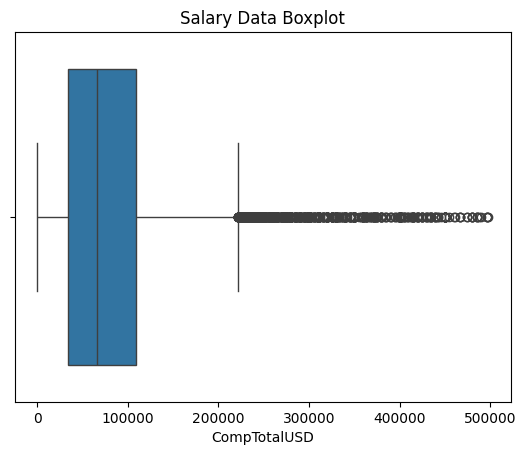

In [ ]:
# Create a boxplot
sns.boxplot(x=survey_df_salaries['CompTotalUSD'])
plt.title("Salary Data Boxplot")
plt.show()

Or with a histogram!

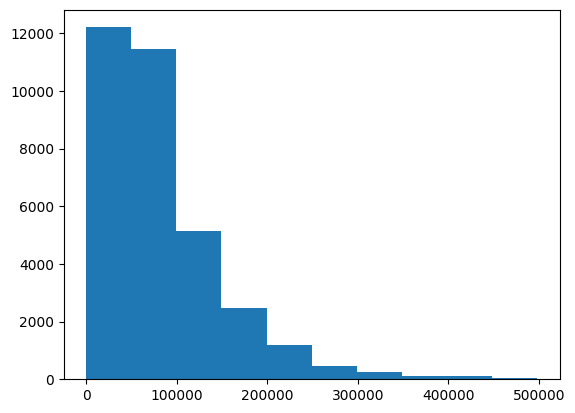

In [ ]:
plt.hist(x = survey_df_salaries['CompTotalUSD'], bins=10)
plt.show()

Based on both plots we can conclude that the outliers begin at the 220K aprox. To find a more precise number we will determine the outlier boundaries calculating the first and third quartiles.

In [ ]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = survey_df_salaries['CompTotalUSD'].quantile(0.25)
Q3 = survey_df_salaries['CompTotalUSD'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify Outliers
outliers = survey_df_salaries[(survey_df_salaries['CompTotalUSD'] < lower_bound) | (survey_df_salaries['CompTotalUSD'] > upper_bound)]

# Display Results
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("# of Outliers:", outliers.shape[0])

Lower Bound: -77841.20394395434
Upper Bound: 221069.0192008303
# of Outliers: 1304


Now we not only know from what value start the outliers but how many outliers we have. What we will do now is delete these values from our survey_df_salaries dataframe.

In [ ]:
survey_df_salaries = survey_df_salaries.query(f'CompTotalUSD < {upper_bound}')

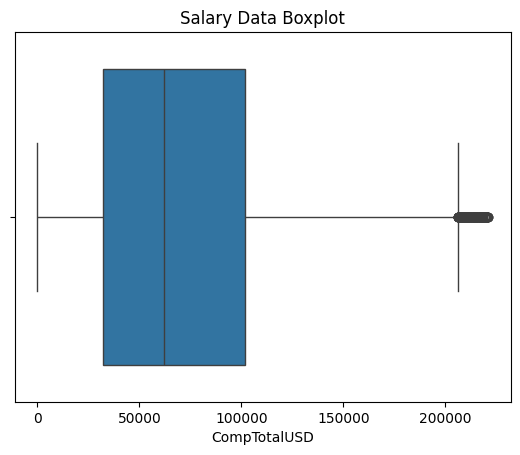

In [ ]:
sns.boxplot(x=survey_df_salaries['CompTotalUSD'])
plt.title("Salary Data Boxplot")
plt.show()

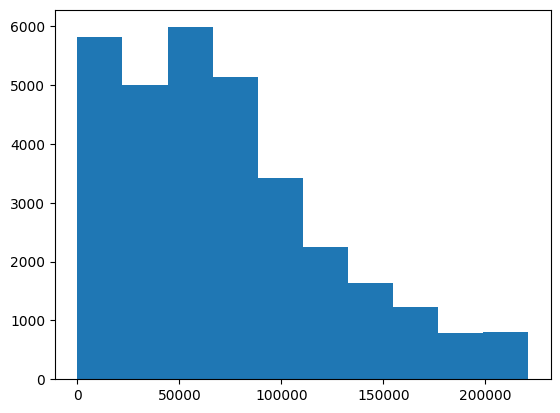

In [ ]:
plt.hist(x = survey_df_salaries['CompTotalUSD'], bins=10)
plt.show()

Now that we got rid from most of the outliers we can take a look at the mean again and get some even better results

In [ ]:
survey_df_salaries['CompTotalUSD'].groupby(survey_df_salaries['Industry']).mean().sort_values(ascending=False)

,CompTotalUSD
Industry,
Healthcare,86000.34
Insurance,85853.09
Government,83991.29
Other:,79571.07
Media & Advertising Services,78992.56
Fintech,78929.85
Retail and Consumer Services,77777.00
"Transportation, or Supply Chain",77695.66
Banking/Financial Services,77685.85


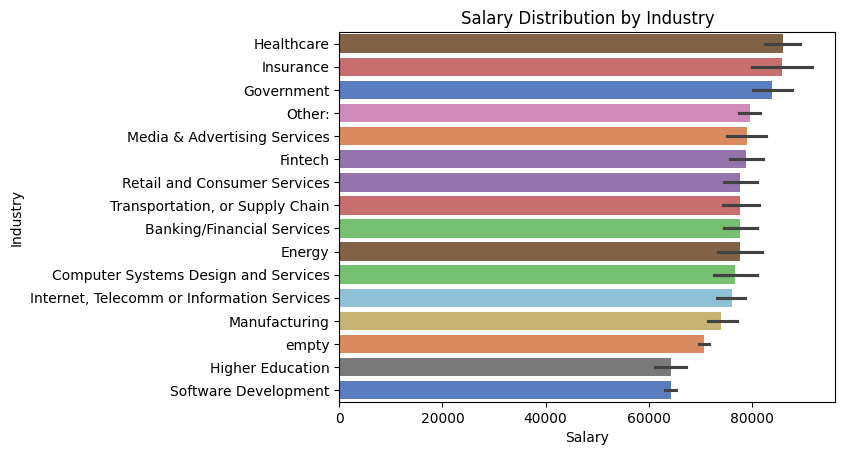

In [ ]:
mean_salary = survey_df_salaries['CompTotalUSD'].groupby(survey_df_salaries['Industry']).mean().sort_values(ascending=False)
sns.barplot(data=survey_df_salaries, x='CompTotalUSD', y='Industry', hue='Industry', palette='muted', order=mean_salary.index)

plt.title('Salary Distribution by Industry')
plt.xlabel('Salary')
plt.ylabel('Industry')
plt.show()

So what industries do developers get paid the most? Based on our previous calculations and data analysis we can conclude that the top 3 industries in which developers get paid the most in average are:

1. Healthcare
2. Insurance
3. Government

## 2. How much does remote working matter to employees?

How many people work remotely?

In [ ]:
survey_df['RemoteWork'].value_counts()

,count
RemoteWork,
"Hybrid (some remote, some in-person)",23015
Remote,20831
In-person,10960


So we have that out of ~53k people 20831 are fully remote and 23015 are partially remote. This tells us initially that the preference is to work remotely since more than 80% of the participants work like that.

We are going to create a separate dataframe so we can deal only with the relevant information for our question. In this new dataframe we will drop the rows that contain NaN values. Dropping these NaN values is important in order to create a good correlation betweeen the remote work and the job satisfaction. For this correlation is useless to have only one question answered, for example if the person answered that they are working remotely but didn't answer their job satisfaction, this also applies for the opposite.


In [ ]:
survey_remote_df = survey_df[['RemoteWork', 'JobSat']].dropna()

In [ ]:
survey_remote_df['RemoteWork'].value_counts()

,count
RemoteWork,
"Hybrid (some remote, some in-person)",12622
Remote,11103
In-person,5392


This leaves us with a dataset of 29117 rows (Before we had ~53k!).
We can see that Hybrid and Remote are a bigger proportion than in person. This is going to influence in our answer later on.

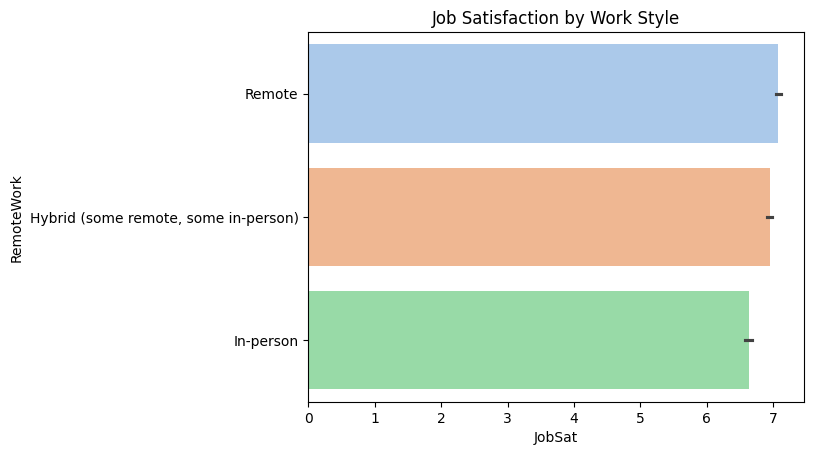

In [ ]:
sns.barplot(data=survey_remote_df, x='JobSat', y='RemoteWork', hue='RemoteWork', palette='pastel')

plt.title('Job Satisfaction by Work Style')
plt.xlabel('JobSat')
plt.ylabel('RemoteWork')
plt.show()

In [ ]:
survey_remote_df['JobSat'].groupby(survey_remote_df['RemoteWork']).mean()

,JobSat
RemoteWork,
"Hybrid (some remote, some in-person)",6.94
In-person,6.63
Remote,7.07


As we can see not only Hybrid and Remote are bigger in proportion compared to In-person, but they also have a bigger score in average compared to working on-site.
Conclusion: To the employees we can say that they are very satisfied working remotely or partially remotely. Including this remote factor in the work life style seems to have a positive impact on employees.

## 3. How does coding experience affect the level of pay?

So again for this question we will use only the relevant information.

In [ ]:
exp_pay_df = survey_df_salaries[['YearsCodePro','CompTotalUSD', 'Industry']]

In [ ]:
exp_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32083 entries, 72 to 65431
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearsCodePro  32083 non-null  object 
 1   CompTotalUSD  32083 non-null  float64
 2   Industry      32083 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1002.6+ KB


In [ ]:
exp_pay_df.query('CompTotalUSD > 0').head()

,YearsCodePro,CompTotalUSD,Industry
72,1,7319.75,Software Development
374,6,29060.72,empty
379,6,88220.03,Computer Systems Design and Services
385,17,51894.14,empty
389,7,110000.00,"Transportation, or Supply Chain"


Change 'Less than one year' to 0.5 and 'More than 50 years' to 51

In [ ]:
exp_pay_df['YearsCodePro'] = exp_pay_df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51  # Or another estimate like 55
}).astype(float)

<ipython-input-44-1a7f8a52ffbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_pay_df['YearsCodePro'] = exp_pay_df['YearsCodePro'].replace({


In [ ]:
exp_pay_df['YearsCodePro'].info()

<class 'pandas.core.series.Series'>
Index: 32083 entries, 72 to 65431
Series name: YearsCodePro
Non-Null Count  Dtype  
--------------  -----  
32083 non-null  float64
dtypes: float64(1)
memory usage: 501.3 KB


In [ ]:
exp_pay_df.head(20)

,YearsCodePro,CompTotalUSD,Industry
72,1.00,7319.75,Software Development
374,6.00,29060.72,empty
379,6.00,88220.03,Computer Systems Design and Services
385,17.00,51894.14,empty
389,7.00,110000.00,"Transportation, or Supply Chain"
392,18.00,156848.64,Retail and Consumer Services
395,25.00,117866.00,empty
398,30.00,195000.00,Healthcare
403,20.00,43424.32,empty
409,50.00,56045.67,empty


In [ ]:
exp_pay_df.query('YearsCodePro == 1' )

,YearsCodePro,CompTotalUSD,Industry
72,1.00,7319.75,Software Development
417,1.00,28022.83,Higher Education
445,1.00,11566.85,empty
501,1.00,650.00,Software Development
515,1.00,136000.00,Software Development
...,...,...,...
65124,1.00,28915.77,Other:
65174,1.00,115.41,empty
65181,1.00,46704.72,empty
65198,1.00,6143.76,empty


In [ ]:
exp_pay_df.query('YearsCodePro == 0.5').head(10)

,YearsCodePro,CompTotalUSD,Industry
484,0.50,143.84,empty
542,0.50,3593.60,Software Development
654,0.50,31017.37,"Internet, Telecomm or Information Services"
770,0.50,32258.06,Fintech
772,0.50,161.82,Software Development
844,0.50,90000.00,empty
998,0.50,8871.58,"Internet, Telecomm or Information Services"
1020,0.50,4794.70,Software Development
1116,0.50,5400.00,Other:
1373,0.50,1141.67,Software Development


In [ ]:
exp_pay_df.query('YearsCodePro == 0').head(10)

,YearsCodePro,CompTotalUSD,Industry
695,0.00,41549.23,Insurance
754,0.00,32744.00,empty
918,0.00,90000.00,empty
1269,0.00,75000.00,Other:
1572,0.00,35881.87,empty
1628,0.00,72651.79,Software Development
4228,0.00,111662.53,empty
4820,0.00,22314.48,empty
5869,0.00,160000.00,empty
6201,0.00,41845.36,Higher Education


Let's try to visualize this!

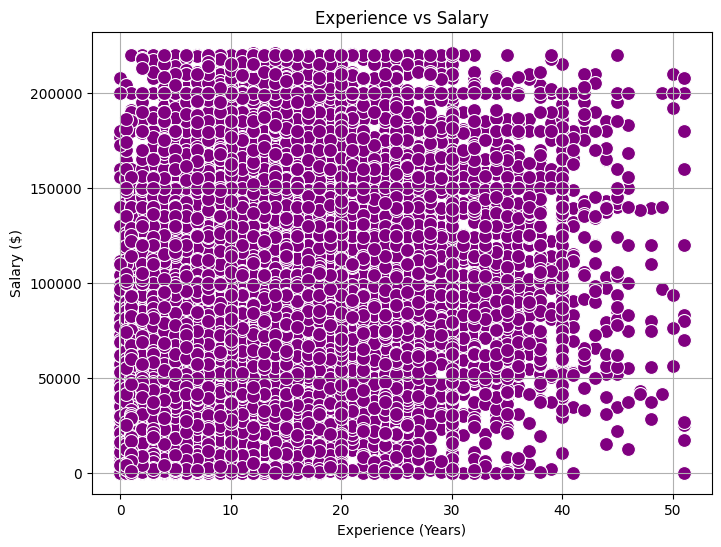

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsCodePro', y='CompTotalUSD', data=exp_pay_df, s=100, color='purple')
plt.title('Experience vs Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.show()

😨
The problem with this plot is that we have people with less or 0 years of professional code experience and they have very high salaries. Maybe they don't programm at their job but it's still somehow related to developing and that's why the have such high salaries.
This question is oriented to people that code for their work. Having this in mind, anyone earning more than e.g. 100K a year with less than a year of experience is going to be filtered out (And I think it also makes sense to filter out people with 0 years of experience).
Based on the website [SwissDevJobs](https://swissdevjobs.ch/salaries/all/Zurich/Junior) the average salary for a junior Software Developer is 77.500 CHF per year and a junior software developer has to have at least 1 year of coding experience. So anyone earning more than that and having less or 1 year of experience is going to be filter out (Introducing this info about the average salary for junior developers in switzerland could be not very realistic since the salaries here are higher than in most places in the world, but thats also kind of the point, anyone earning more than that with less than one year or two of experience is either lying or simply their main task is not coding)

In [ ]:
df = exp_pay_df.drop(exp_pay_df[exp_pay_df['YearsCodePro'] == 0].index)
df = df.drop(df[(df['YearsCodePro'] <= 2) & (df['CompTotalUSD'] > 77500)].index)
df.query('YearsCodePro <= 2').head(10)

,YearsCodePro,CompTotalUSD,Industry
72,1.00,7319.75,Software Development
417,1.00,28022.83,Higher Education
445,1.00,11566.85,empty
484,0.50,143.84,empty
501,1.00,650.00,Software Development
542,0.50,3593.60,Software Development
567,2.00,479.47,empty
598,2.00,2924.34,empty
602,2.00,158.23,empty
654,0.50,31017.37,"Internet, Telecomm or Information Services"


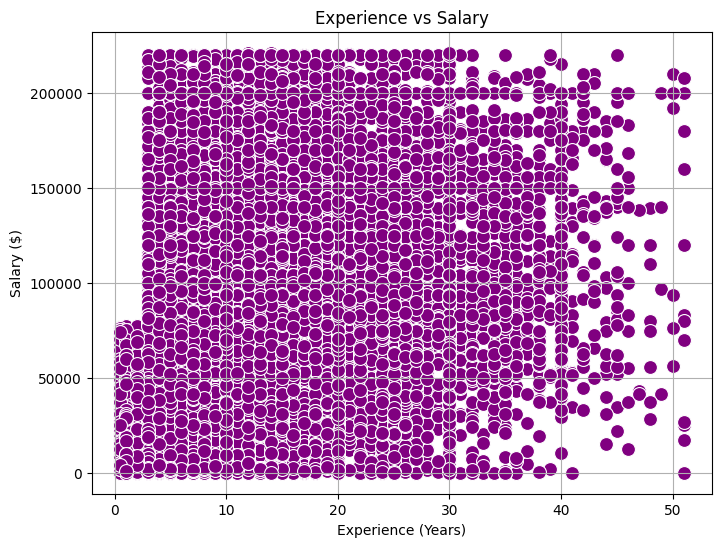

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsCodePro', y='CompTotalUSD', data=df, s=100, color='purple')
plt.title('Experience vs Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.show()

At this point I came to realize that instead of slicing down the dataset for each amount of years of experience I will use a better plot in which we could easily identify the outliers and see a pattern. Another problem of my initial approach is that I was basing ranges based on external information, in other words If I were to keep doing that I'd be creating a biased pattern

In [ ]:
exp_pay_df = exp_pay_df.drop(exp_pay_df[exp_pay_df['YearsCodePro'] == 0].index)

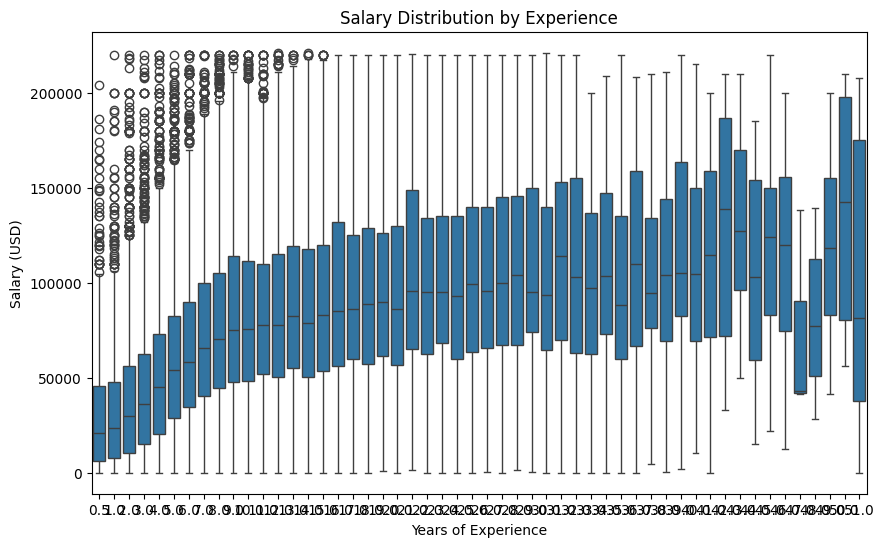

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearsCodePro', y='CompTotalUSD', data=exp_pay_df)
plt.title('Salary Distribution by Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.show()

Now despite the outliers we can see a pattern that tell us that initially the first ~10 years of coding professionally the salary goes up from a ~25K in average up to ~70K, after this, the salary goes up but not in the same proportion as in the first 10 years. It's also worth mentioning that the ranges of salary increment as you get more experienced. (I know, The years of experience overlap with each other making it really difficult to read)

## 3. What's the most popular method of learning to code?


In [ ]:
survey_df[['LearnCode', 'LearnCodeOnline', 'TechDoc']].head(10)

,LearnCode,LearnCodeOnline,TechDoc
0,Books / Physical media,NaN,NaN
1,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...
2,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...
3,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN
4,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...
5,"School (i.e., University, College, etc);Online...",NaN,NaN
6,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,NaN
7,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,First-party knowledge base
8,Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,NaN
9,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,Traditional public search engine;AI-powered se...


In [ ]:
# One-hot encoding
survey_df_encoded = survey_df['LearnCode'].str.get_dummies(sep=';')

In [ ]:
survey_df_encoded.head()

,Books / Physical media,Coding Bootcamp,Colleague,Friend or family member,On the job training,Online Courses or Certification,Other (please specify):,"Other online resources (e.g., videos, blogs, forum, online community)","School (i.e., University, College, etc)"
0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,1,0
2,1,0,1,0,1,0,0,1,1
3,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,1,0


In [ ]:
category_totals = survey_df_encoded.sum()
category_totals = category_totals.sort_values(ascending=False)

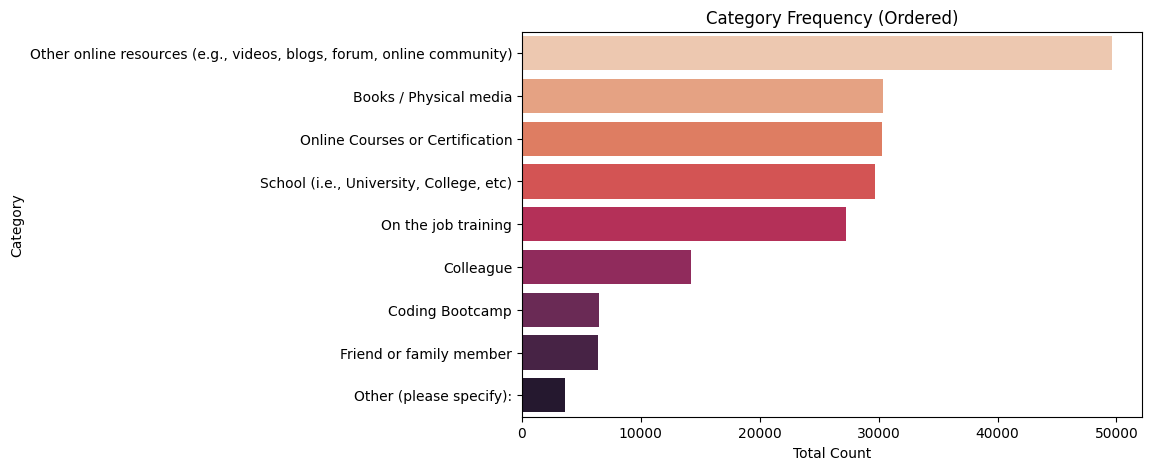

In [ ]:
# Create horizontal bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=category_totals.values, y=category_totals.index, hue=category_totals.index, palette='rocket_r')

# Titles & Labels
plt.xlabel('Total Count')
plt.ylabel('Category')
plt.title('Category Frequency (Ordered)')

plt.show()

CONCLUSION: For a first conclusion, from all the options (online resources, books, school,  etc...) the most popular method of learning for coding is through online resources like videos, blogs, forums or an online community.

Now for favorite Online resources used to learn how to code.

In [ ]:
# One-hot encoding
survey_df_learn_online_encoded = survey_df['LearnCodeOnline'].str.get_dummies(sep=';')
survey_df_learn_online_encoded.head()

,AI,"Auditory material (e.g., podcasts)",Blogs,Books,Certification videos,Coding sessions (live or recorded),How-to videos,Interactive tutorial,"Online challenges (e.g., daily or weekly coding challenges)",Other (Please specify):,Programming Games,Social Media,Stack Overflow,Technical documentation,Video-based Online Courses,Written Tutorials,Written-based Online Courses
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0
2,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0
3,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0


In [ ]:
category_online_totals = survey_df_learn_online_encoded.sum().sort_values(ascending=False)

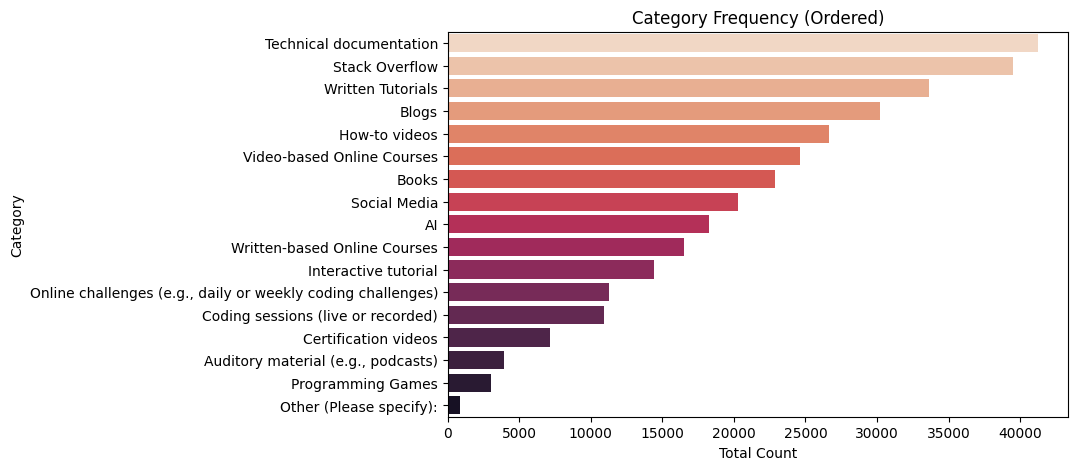

In [ ]:
# Create horizontal bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=category_online_totals.values, y=category_online_totals.index, hue=category_online_totals.index, palette='rocket_r')

# Titles & Labels
plt.xlabel('Total Count')
plt.ylabel('Category')
plt.title('Category Frequency (Ordered)')

plt.show()

CONCLUSION: Technical Doc & Stack Overflow are the top online resources used for learning

Since technical documentation is the main resource used for learning. What is top source of the technical documentation people use most often to learn to
code?

In [ ]:
# One-hot encoding
survey_df_tech_doc_encoded = survey_df['TechDoc'].str.get_dummies(sep=';')
survey_df_tech_doc_encoded.head()

,AI-powered search/dev tool (free),AI-powered search/dev tool (paid),API document(s) and/or SDK document(s),First-party knowledge base,Other (please specify):,Traditional public search engine,User guides or README files found in the source repository
0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,1
2,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0
4,0,0,1,1,0,1,1


In [ ]:
category_tech_doc_totals = survey_df_tech_doc_encoded.sum().sort_values(ascending=False)

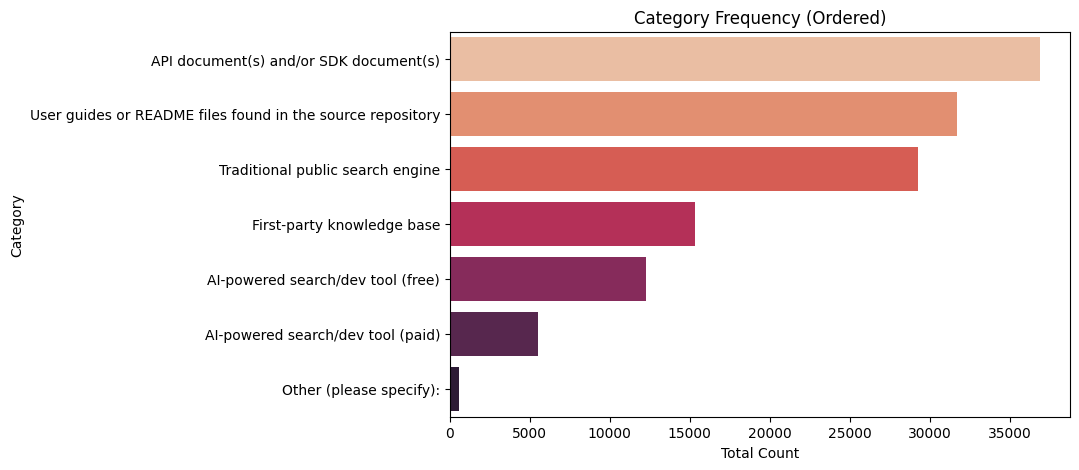

In [ ]:
# Create horizontal bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=category_tech_doc_totals.values, y=category_tech_doc_totals.index, hue=category_tech_doc_totals.index, palette='rocket_r')

# Titles & Labels
plt.xlabel('Total Count')
plt.ylabel('Category')
plt.title('Category Frequency (Ordered)')

plt.show()

CONCLUSION: API and/or SDK documents and user guides or README files are the top source of technical documentation.

## 3. Are you more likely to get a job as a developer if you have a master's degree?

This question is particularly interesting for me since I'm doing a master's degree in data science right now so lets find out if I have good odds! (Otherwise I'm cooked 🙂).

Let's see the job situation of the people.

In [ ]:
survey_df['Employment'].value_counts()

,count
Employment,
"Employed, full-time",39041
"Independent contractor, freelancer, or self-employed",4846
"Student, full-time",4709
"Employed, full-time;Independent contractor, freelancer, or self-employed",3557
"Not employed, but looking for work",2341
...,...
"Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired",1
"Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired",1
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",1


In [ ]:
# One-hot encoding
survey_employment_encoded = survey_df['Employment'].str.get_dummies(sep=';')
survey_employment_encoded.head()

,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


In [ ]:
survey_employement_encoded_totals = survey_employment_encoded.sum().sort_values(ascending=False)

In [ ]:
survey_employement_encoded_totals

,0
"Employed, full-time",45162
"Independent contractor, freelancer, or self-employed",10726
"Student, full-time",8626
"Employed, part-time",4145
"Not employed, but looking for work",3954
"Student, part-time",2656
"Not employed, and not looking for work",1203
Retired,681
I prefer not to say,546


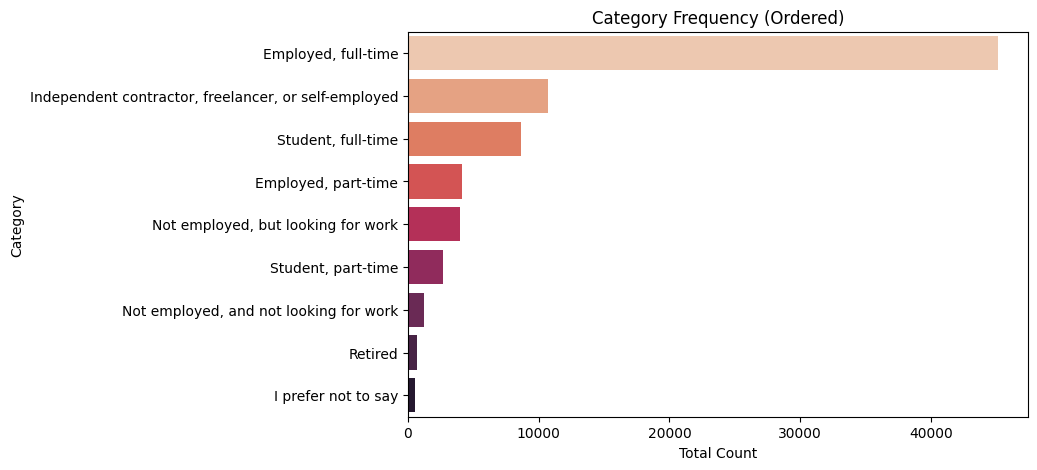

In [ ]:
# Create horizontal bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=survey_employement_encoded_totals.values, y=survey_employement_encoded_totals.index, hue=survey_employement_encoded_totals.index, palette='rocket_r')

# Titles & Labels
plt.xlabel('Total Count')
plt.ylabel('Category')
plt.title('Category Frequency (Ordered)')

plt.show()

The proportion of people working full time, self employed, part time is way bigger than those that are unemployed or retired. Let's see how many of these employed people have a master's degree and based on this proportion conclude if it's really worth it do a master's degree in order to get hired.

In [ ]:
survey_df_concat = pd.concat([survey_df, survey_employment_encoded['Employed, full-time']], axis=1)
survey_df_concat.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,TBranch,ICorPM,WorkExp,TimeSearching,Industry,JobSat,CurrencyAbr,CurrencyLong,CompTotalUSD,"Employed, full-time"
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,No,NaN,0.00,NaN,NaN,NaN,USD,NaN,0.00,1
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,Yes,Individual contributor,17.00,NaN,NaN,NaN,USD,NaN,0.00,1
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,No,NaN,0.00,NaN,NaN,NaN,USD,NaN,0.00,1
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,0.00,NaN,NaN,NaN,USD,NaN,0.00,0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,0.00,NaN,NaN,NaN,USD,NaN,0.00,0


In [ ]:
employed_fulltime = survey_df_concat.query('`Employed, full-time` == 1')[['EdLevel']].value_counts()
employed_fulltime

,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",19136
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12489
Some college/university study without earning a degree,4494
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2312
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1860
"Associate degree (A.A., A.S., etc.)",1260
Something else,448
Primary/elementary school,201


<Axes: ylabel='EdLevel'>

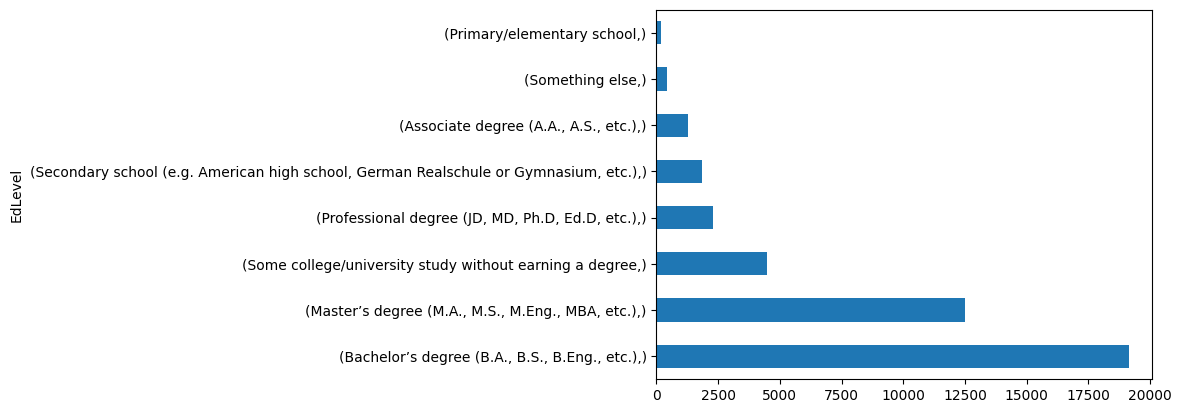

In [ ]:
employed_fulltime.plot(kind='barh')

CONCLUSION: The majority of survey respondents hold a Bachelor's degree, with individuals possessing a Master's degree coming in second. Based on the previous graph, it appears that having a Bachelor's degree alone positions you well for job hunting, as it seems sufficient to secure employment opportunities. This does not imply that a Master's degree makes you less attractive to employers—in fact, it could positively influence your salary.

A Bachelor's degree still seems to provide strong prospects for being hired. While a Master's degree may not significantly increase your chances of getting hired compared to a Bachelor's degree alone, it could have a more pronounced impact on salary levels. Further analysis would be needed to definitively determine the extent to which a Master's degree influences hiring probability versus salary.

## END OF PROJECT
The primary objective of this project was to leverage data analysis techniques to extract meaningful insights from our dataset and address specific questions. However, the dataset holds even greater potential. By delving deeper, we can uncover additional valuable information, leading to a more comprehensive understanding of the data. This, in turn, would enable us to tackle more complex questions, such as whether obtaining a master's degree significantly impacts salary compared to holding only a bachelor's degree. Further exploration could reveal nuanced patterns and relationships, providing a richer foundation for data-driven decision-making.
Some of the techniques used in this project were:
- Handling Missing Values
- Outlier Detection
- Encoding Categorical Variables
- Summary Statistics
- Data Visualization
- Feature Engineering
- Bivariate Analysis
- Univariate Analysis
- Insight Extraction

Thanks for reading until the end btw (I know it was pretty long), I appreciate you and I hope you learned something along the way!🤗